In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


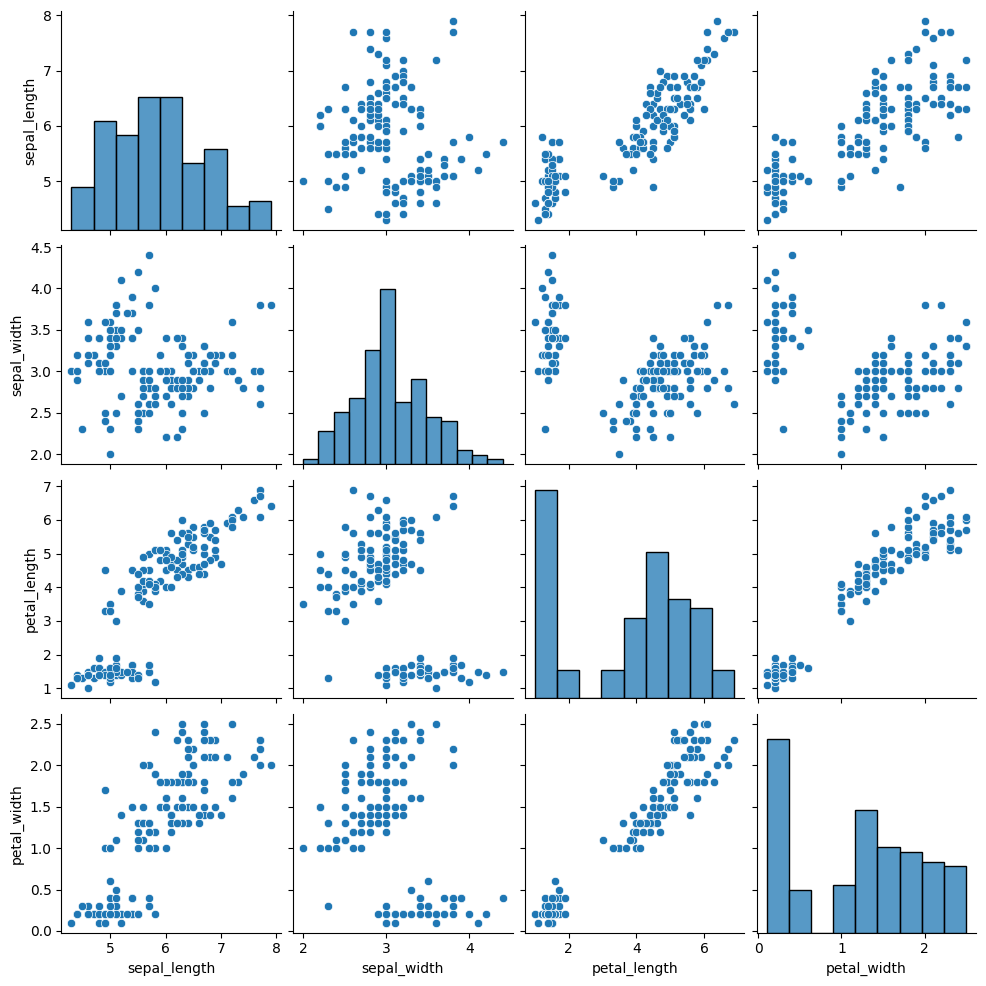

In [6]:
sns.pairplot(df);

## K Means Clustering

In [7]:
Z = df.copy()

In [8]:
X = Z.drop("species", axis = 1)

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X.shape

(150, 4)

In [11]:
from sklearn.cluster import KMeans

In [12]:
K_Means_model = KMeans(n_clusters=5, random_state = 42)

In [13]:
K_Means_model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

In [14]:
#K_Means_model.fit(X)

In [15]:
#K_Means_model.predict(X)   ##this code for new datasets

In [17]:
#K_Means_model.labels_

In [19]:
X["Classes"] = K_Means_model.labels_
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


# Hopkin's Test

In [21]:
!pip install pyclustertend
from pyclustertend import hopkins

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [22]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]
# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur!
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [23]:
X = X.drop("Classes", axis = 1)

In [26]:
hopkins(X, X.shape[0])

0.15932717967446813

In [28]:
hopkins(X, 60)  ## Hopkins test-> Cumulativity of dataset if it is convinient for clustering. 
## More than 50 is not acceptable score. Clode to 0 is better

0.1661894536450299

## Elbow Method

In [29]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

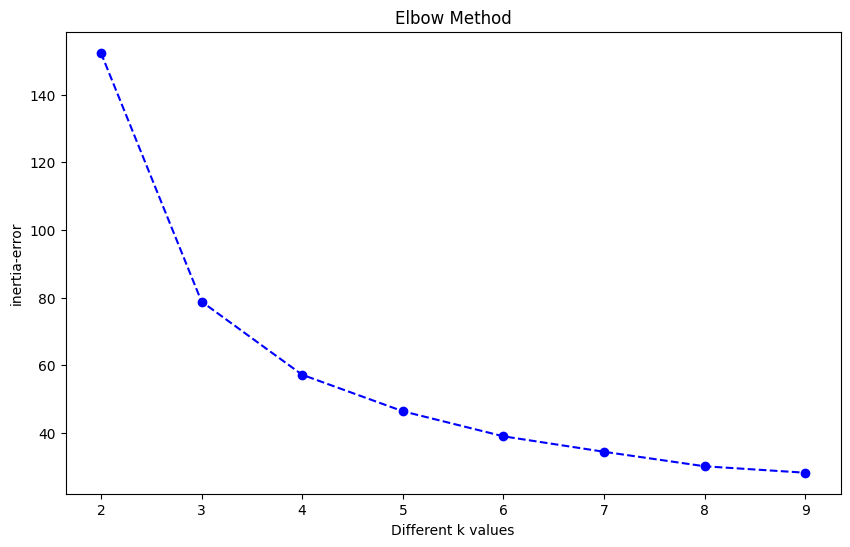

In [30]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")  #Optimum K value -> is the most sharpest and first value.

In [31]:
ssd

[152.34795176035792,
 78.85144142614601,
 57.22847321428572,
 46.44618205128205,
 39.03998724608725,
 34.469495898838005,
 30.186555194805194,
 28.28937085137085]

In [32]:
pd.Series(ssd).diff()

0          NaN
1   -73.496510
2   -21.622968
3   -10.782291
4    -7.406195
5    -4.570491
6    -4.282941
7    -1.897184
dtype: float64

In [33]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x:x+1)

In [35]:
df_diff

,0
1,NaN
2,73.496510
3,21.622968
4,10.782291
5,7.406195
6,4.570491
7,4.282941
8,1.897184


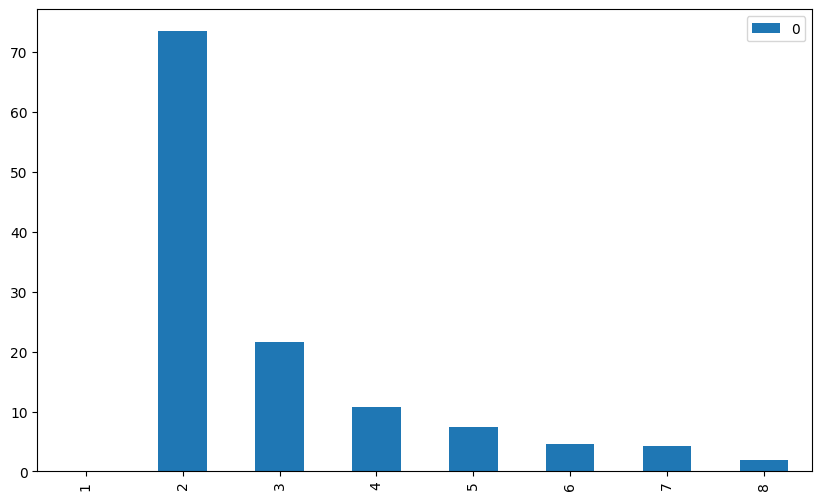

In [42]:
df_diff.plot(kind="bar");

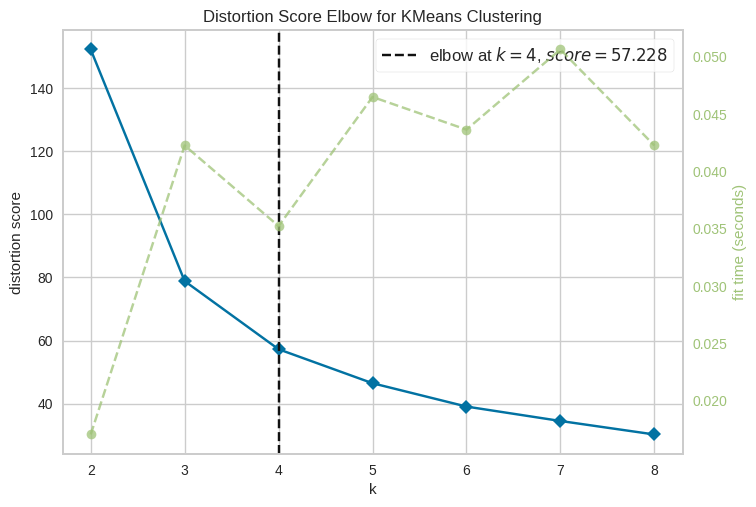

In [45]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)

visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## Silhuette Analysis

In [46]:
## Siluette shows us how data cumulated around the centrois and also how far from other datapints.

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5528190123564102
For n_clusters=4, the silhouette score is 0.49805050499728815
For n_clusters=5, the silhouette score is 0.48874888709310654
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.34974816211612186
For n_clusters=8, the silhouette score is 0.3574536925852728


In [50]:
## Silhuoetto scores which is the closest to the 1 is better score. #2 cluster is better but we 
## choose together with inertia scores. ->3. 

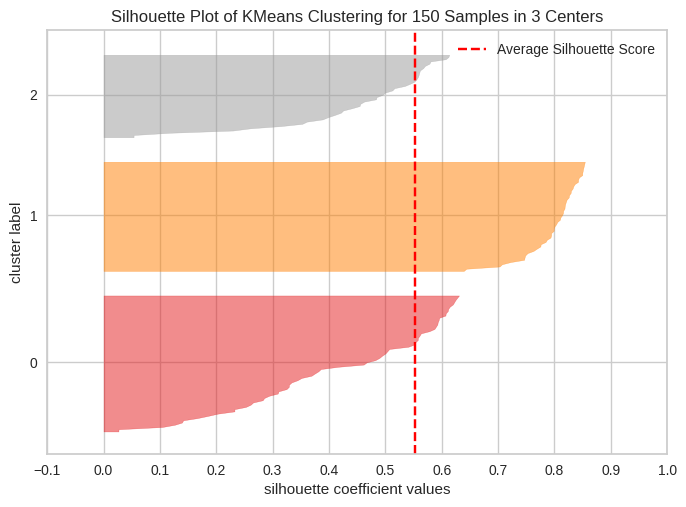

In [56]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [58]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [59]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [60]:
cluster = model.labels_

In [61]:
X["predicted_clusters"] = cluster

In [63]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [64]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
df["predicted_clusters"] = cluster

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [67]:
ct = pd.crosstab(df.predicted_clusters, df.species)
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Adjust Rand Score

In [68]:
from sklearn.metrics import adjusted_rand_score

In [70]:
df_end = df
df_end

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [72]:
adjusted_rand_score(df_end.species, df_end.predicted_clusters) ##how close to 1 is better (uyumlu)

0.7302382722834697

## Visualization Clusters

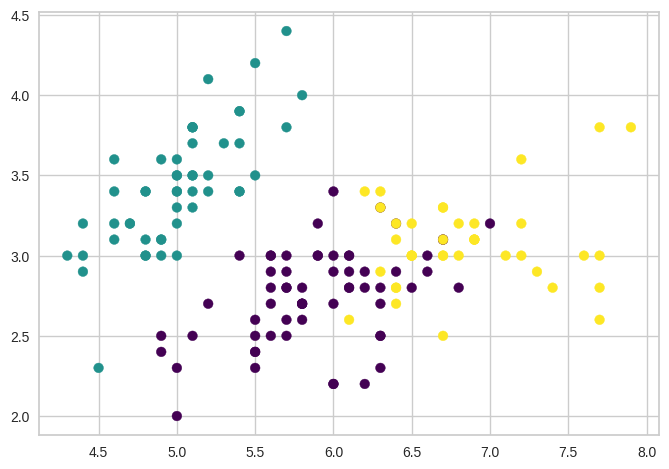

In [73]:
plt.scatter(df["sepal_length"], df["sepal_width"], c = df.predicted_clusters, cmap = "viridis");

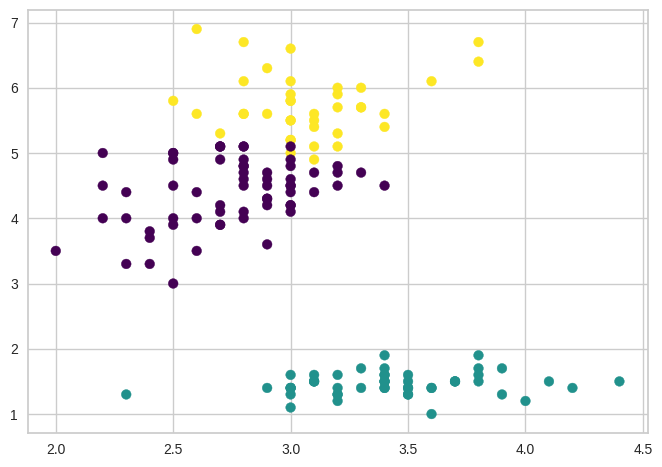

In [74]:
plt.scatter(df["sepal_width"], df["petal_length"], c = df.predicted_clusters, cmap = "viridis");

In [76]:
centers = model.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [77]:
centers[:, 0]

array([5.9016129, 5.006    , 6.85     ])

In [78]:
centers[:, 1]

array([2.7483871 , 3.428     , 3.07368421])

In [79]:
centers[:, 2]

array([4.39354839, 1.462     , 5.74210526])

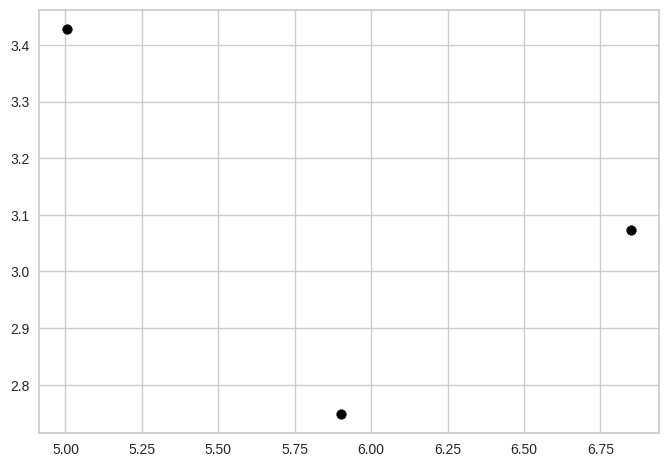

In [81]:
plt.scatter(centers[:, 0], centers[:, 1], c = "black");

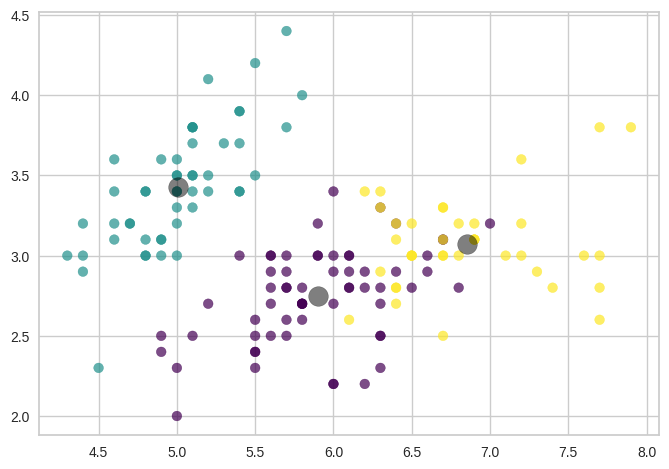

In [83]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha = 0.7);
plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 200, alpha = 0.5);

In [84]:
df.iloc[:, [0, 1, 2, 3, 5]].head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [86]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.901613,5.006,6.850000
sepal_width,2.748387,3.428,3.073684
petal_length,4.393548,1.462,5.742105
petal_width,1.433871,0.246,2.071053


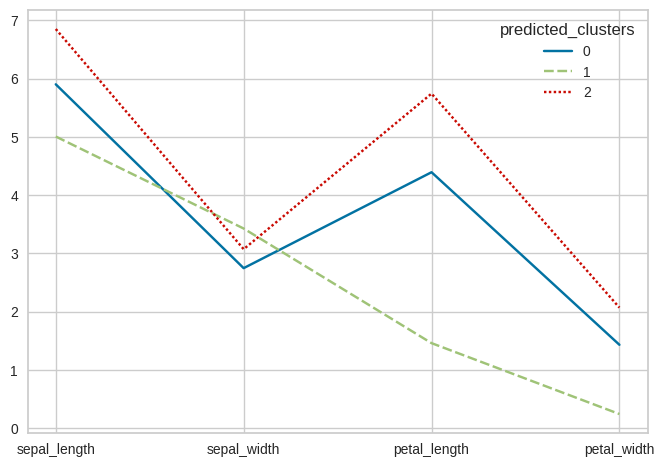

In [87]:
sns.lineplot(data=clus_pred);

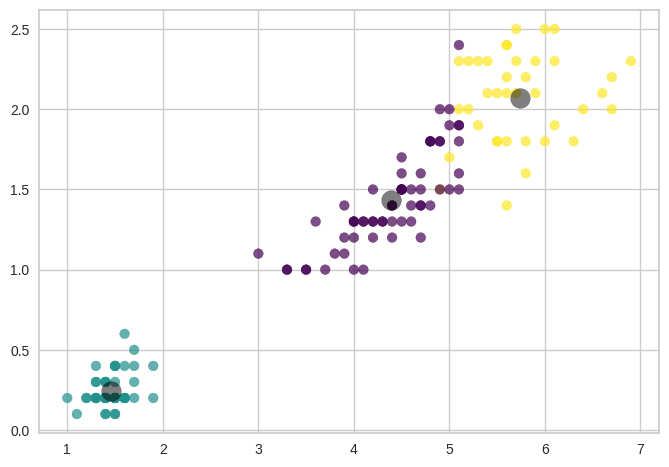

In [88]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha = 0.7);
plt.scatter(centers[:, 2], centers[:, 3], c = "black", s = 200, alpha = 0.5);

In [89]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Hopkins Test

In [91]:
hopkins(X2, X2.shape[0])

0.09475306729864282

In [92]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

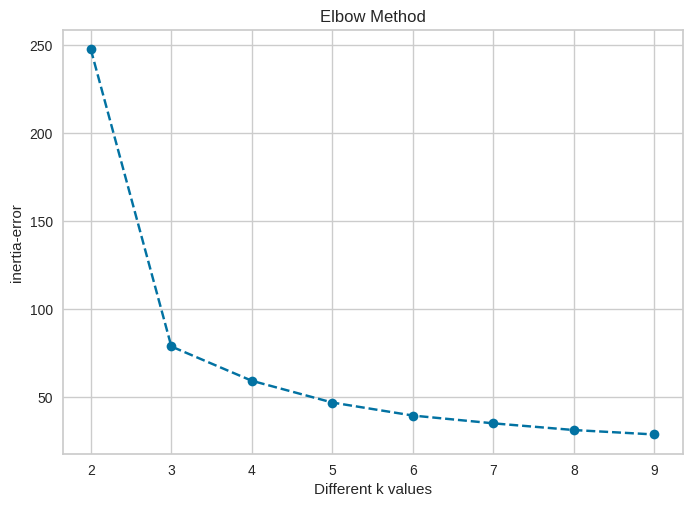

In [93]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")  #Optimum K value -> is the most sharpest and first value.

In [94]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x:x+1)

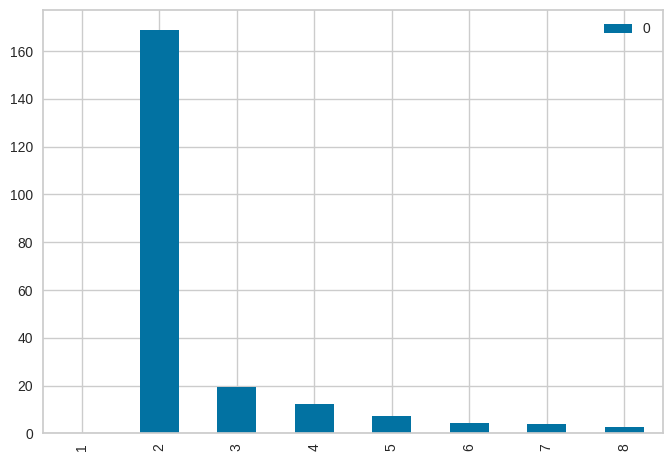

In [98]:
df_diff.plot(kind="bar");

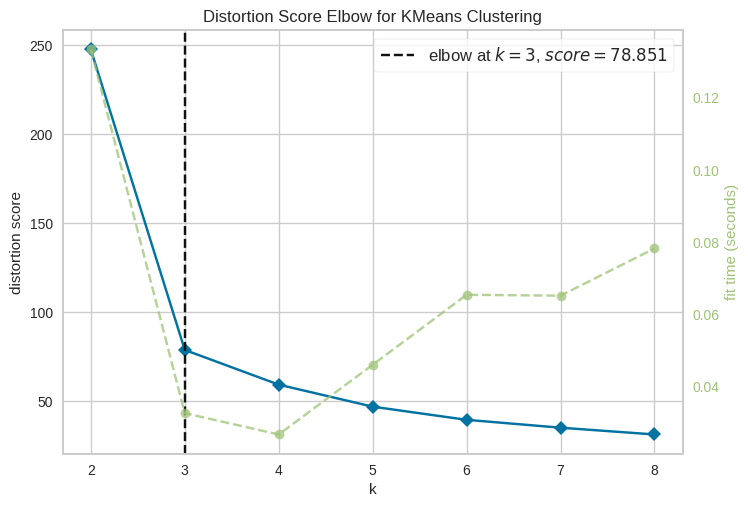

In [99]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)

visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## Silhouette Analysis

In [101]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6213468887749368
For n_clusters=3, the silhouette score is 0.6851559988597147
For n_clusters=4, the silhouette score is 0.5772635813809022
For n_clusters=5, the silhouette score is 0.5388083715021846
For n_clusters=6, the silhouette score is 0.41093583693136543
For n_clusters=7, the silhouette score is 0.37545391283696317
For n_clusters=8, the silhouette score is 0.37552388696755157


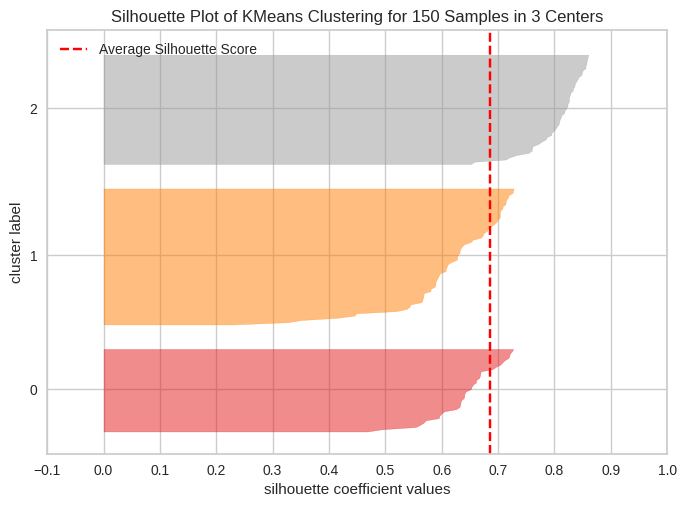

In [102]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [103]:
final_model = KMeans(n_clusters = 3, random_state = 42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [104]:
X2["species"] = df["species"]

In [105]:
X2["predicted_clusters"] = final_model.labels_

In [107]:
X2.head()

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


## Adjust Rand Score

In [108]:
adjusted_rand_score(X2.species, X2.predicted_clusters)

0.8856970310281228

In [109]:
pd.crosstab(X2.predicted_clusters, X2.species)

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [112]:
X2_ct = pd.crosstab(X2.predicted_clusters, X2.species).rename(index = {0:2, 2:0})
X2_ct.columns = ["setosa_X2", "versicolor_X2", "virginicia_X2"]
X2_ct

,setosa_X2,versicolor_X2,virginicia_X2
predicted_clusters,,,
2,0,2,46
1,50,0,0
0,0,48,4


In [113]:
X_ct = pd.crosstab(df.predicted_clusters, df.species)
X_ct.columns = ["setosa_X2", "versicolor_X2", "virginicia_X2"]
X_ct

,setosa_X2,versicolor_X2,virginicia_X2
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [114]:
pd.concat([X2_ct, X_ct], axis = 1)

,setosa_X2,versicolor_X2,virginicia_X2,setosa_X2,versicolor_X2,virginicia_X2
predicted_clusters,,,,,,
2,0,2,46,0,2,36
1,50,0,0,50,0,0
0,0,48,4,0,48,14


## Prediction Clusters of new data

In [116]:
new_data = [[1.7, 0.2]]

In [117]:
final_model.predict(new_data)

array([1], dtype=int32)